# DATA ANALYSIS OF NASA EXOPLANETS 
### Let's explore alien worlds

*(The NASA Exoplanet Archive is a database that contains information on all known exoplanets (planets outside our solar system) discovered by NASA's various space missions, ground-based observatories, and other sources.)*

**TODO** - This is the analysis of the data mentioned in the given dataset of NASA Exoplanets. This dataset can be found on [NASA Exoplanets Dataset](https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets). The tools use here are mainly `Numpy, Pandas, Matplotlib and Seaborn`.

![The Project](https://i0.wp.com/spaceexplored.com/wp-content/uploads/sites/10/2022/09/Planets_everywhere_artists_impression.jpg)

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The dataset is available for free on Kaggle.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rashcasm
Your Kaggle Key: ········


100%|██████████| 114k/114k [00:00<00:00, 161kB/s]

The dataset has been downloaded and extracted.

In [8]:
data_dir = './nasaexoplanets'

In [9]:
import os
os.listdir(data_dir)

['cleaned_5250.csv']

Let us save and upload our work to Jovian before continuing.

In [10]:
project_name = "nasa-exoplanets-analysis"

In [11]:
!pip install jovian --upgrade -q

In [12]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

## Data Preparation and Cleaning

The dataset is already pretty clean.

In [14]:
import pandas as pd
import numpy as np

We load the CSV file.

In [16]:
planets_df = pd.read_csv(data_dir + '/cleaned_5250.csv')

Let's get a glimpse of this dataset.

In [20]:
planets_df.sample(5)

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
3561,Kepler-364 c,2908.0,13.754,Neptune-like,2014,5.27,Earth,2.150,Earth,0.312000,0.164271,0.00,Transit
2622,Kepler-1617 b,2930.0,13.811,Super Earth,2016,1.87,Earth,1.200,Earth,0.181000,0.075291,0.00,Transit
3816,Kepler-509 b,1084.0,11.848,Neptune-like,2016,6.76,Earth,0.222,Jupiter,0.238400,0.114168,0.00,Transit
276,GJ 625 b,21.0,10.066,Super Earth,2017,2.82,Earth,1.490,Earth,0.078361,0.039973,0.13,Radial Velocity
1694,K2-43 b,595.0,15.748,Neptune-like,2016,18.50,Earth,0.402,Jupiter,0.037840,0.009582,0.07,Transit


In [27]:
rows = len(planets_df)
col = len(planets_df.columns)
print(f'Number of rows = {rows}')
print(f'Number of columns = {col}\n')
planets_df.info()

Number of rows = 5250
Number of columns = 13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


Here, we got a general information about the dataset. The data is clean and prepared.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rashmin9c/nasa-exoplanets-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rashmin9c/nasa-exoplanets-analysis


'https://jovian.com/rashmin9c/nasa-exoplanets-analysis'

## Exploratory Analysis and Visualization

**Exploratory Analysis** is the initial phase of data analysis where we examine and explore the data to understand its characteristics, identify patterns, relationships, and gain insights.

**Data Visualization** is the graphical representation of data to present information in a visually appealing and easy-to-understand format.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [39]:
planets_df.planet_type.unique()

array(['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial',
       'Unknown'], dtype=object)

**TODO - Finding the number of planets in each type.**

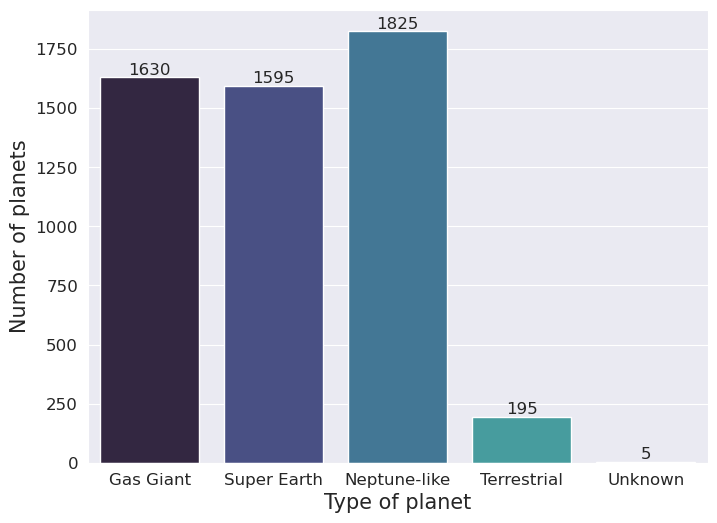

In [82]:
gasgiant = planets_df.planet_type == 'Gas Giant'
no_gasgiant = planets_df[gasgiant]
number_of_gasgiant = len(no_gasgiant)

superearth = planets_df.planet_type == 'Super Earth'
no_superearth = planets_df[superearth]
number_of_superearth = len(no_superearth)

neptunelike = planets_df.planet_type == 'Neptune-like'
no_neptunelike = planets_df[neptunelike]
number_of_neptunelike = len(no_neptunelike)

terrestrial = planets_df.planet_type == 'Terrestrial'
no_terrestrial = planets_df[terrestrial]
number_of_terrestrial = len(no_terrestrial)

unknown = planets_df.planet_type == 'Unknown'
no_unknown = planets_df[unknown]
number_of_unknown = len(no_unknown)

Types = ['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial', 'Unknown']
Number_of_planets = [number_of_gasgiant, number_of_superearth, number_of_neptunelike, number_of_terrestrial, number_of_unknown]

plt.subplots(figsize = (8, 6), dpi = 100)

ax = sns.barplot(x=Types,y=Number_of_planets ,palette='mako');
ax.set_ylabel('Number of planets', fontsize = 15)
ax.set_xlabel("Type of planet", fontsize = 15)
for i in ax.containers:
    ax.bar_label(i,)

Here, we categorized the planets according to their type and plotted a histogram to see the number of exoplanets in each type.

**TODO - Plot a discovery year vs distance scatter plot**

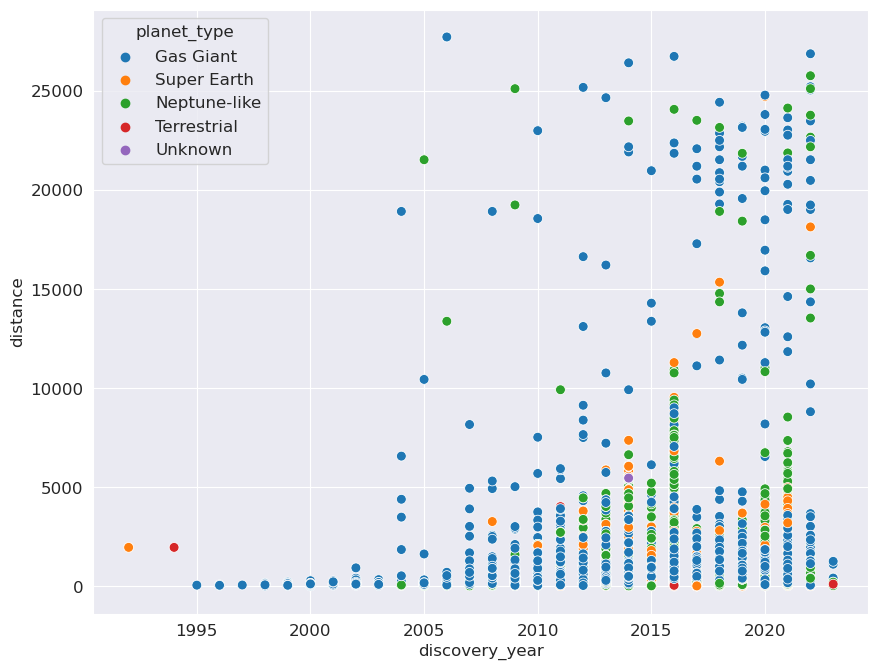

In [69]:
plt.subplots(figsize = (10, 8), dpi = 100)
sns.scatterplot(x=planets_df.discovery_year, y=planets_df.distance, hue=planets_df.planet_type, s=50);

After analyzing the obtained graph, we can see that in the later years, the planets more far were discovered in large number.

**TODO - Plot heatmap of Correlation between distance, stellar_magnitude, discovery_year, orbital period and eccentricity)** 

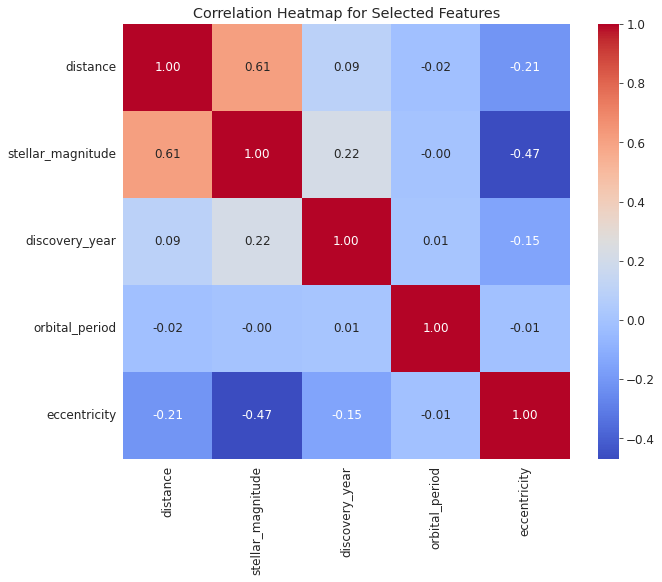

In [78]:
selected_features = ['distance', 'stellar_magnitude', 'discovery_year', 'orbital_period', 'eccentricity']
corr_matrix = planets_df[selected_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

**TODO- Compare the average stellar magnitudes for each planet type**

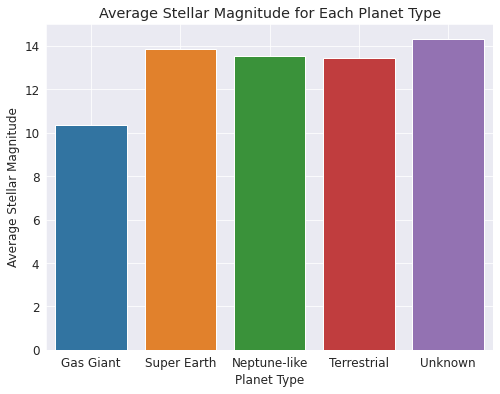

In [80]:
plt.figure(figsize=(8, 6))
sns.barplot(x='planet_type', y='stellar_magnitude', data=planets_df, ci=None)
plt.xlabel('Planet Type')
plt.ylabel('Average Stellar Magnitude')
plt.title('Average Stellar Magnitude for Each Planet Type')
plt.grid(True)
plt.show()

**TODO - Visualize the distribution of stellar magnitudes**

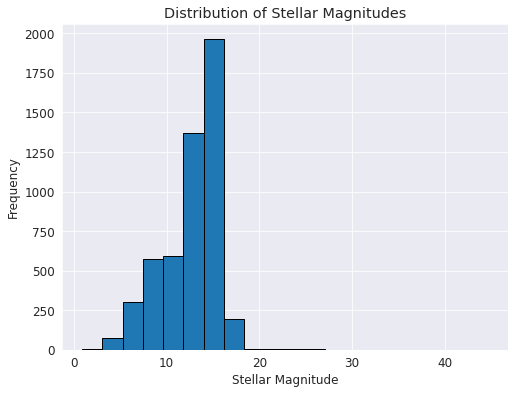

In [83]:
plt.figure(figsize=(8, 6))
plt.hist(planets_df['stellar_magnitude'], bins=20, edgecolor='k')
plt.xlabel('Stellar Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Stellar Magnitudes')
plt.grid(True)
plt.show()

Let us save and upload our work to Jovian before continuing

In [84]:
import jovian

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rashmin9c/nasa-exoplanets-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rashmin9c/nasa-exoplanets-analysis


'https://jovian.com/rashmin9c/nasa-exoplanets-analysis'

## Asking and Answering Questions

#### Q1: What is the distribution of planet types in the dataset?

We will plot a bar chart to visualize the number of planets in each planet type.


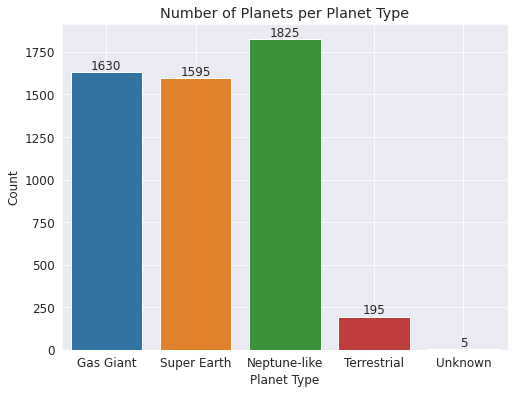

In [89]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='planet_type', data=planets_df)
plt.xlabel('Planet Type')
plt.ylabel('Count')
plt.title('Number of Planets per Planet Type')
plt.grid(True)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

#### Q2: How do the distances of the planets vary based on their discovery years?

We can create a scatter plot to observe how the distances of planets have been discovered over the years.

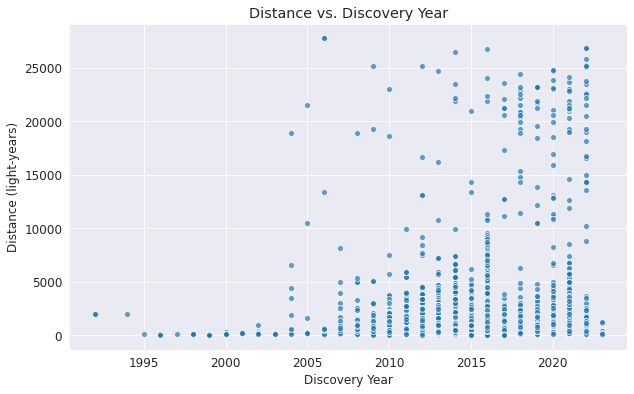

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(planets_df['discovery_year'], planets_df['distance'], alpha=0.7, edgecolors='w')
plt.xlabel('Discovery Year')
plt.ylabel('Distance (light-years)')
plt.title('Distance vs. Discovery Year')
plt.grid(True)
plt.show()

#### Q3: What is the average orbital radius (wrt respective given planets) and eccentricity for each detection method?

We will group the data by the detection method and calculate the mean orbital radius and eccentricity for each method.

In [93]:
grouped_df = planets_df.groupby('detection_method').agg({
    'orbital_radius': 'mean',
    'eccentricity': 'mean'
}).reset_index()

grouped_df

,detection_method,orbital_radius,eccentricity
0,Astrometry,0.499825,0.350000
1,Direct Imaging,514.123769,0.101452
2,Disk Kinematics,130.000000,0.000000
3,Eclipse Timing Variations,3.962357,0.138824
4,Gravitational Microlensing,2.541477,0.003701
5,Orbital Brightness Modulation,0.013667,0.000000
6,Pulsar Timing,4.897800,0.050243
7,Pulsation Timing Variations,1.700000,0.075000
8,Radial Velocity,2.112706,0.216244
9,Transit,0.128524,0.025093


we group the data by the detection_method column and calculate the mean values of orbital_radius and eccentricity for each detection method. The agg function is used to apply multiple aggregation functions to different columns simultaneously. The result is displayed as a DataFrame showing the average orbital radius and eccentricity for each detection method.

#### Q4: Is there any relationship between the orbital period and the distance of planets?

We will create a scatter plot to explore the relationship between the orbital period and the distance of planets from their host stars.

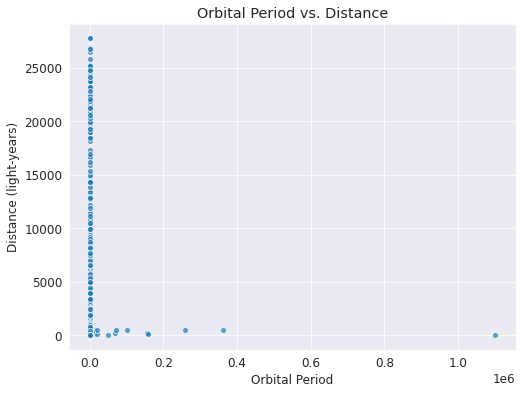

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(planets_df['orbital_period'], planets_df['distance'], alpha=0.7, edgecolors='w')
plt.xlabel('Orbital Period')
plt.ylabel('Distance (light-years)')
plt.title('Orbital Period vs. Distance')
plt.grid(True)
plt.show()

we create a scatter plot to examine whether there is any relationship between the orbital period and the distance of planets from their host stars. The x-axis represents the orbital period, while the y-axis represents the distance of planets

#### Q5: What is the most common method of planet detection among different planet types?

We will create a stacked bar plot to compare the distribution of different planet detection methods for each planet type.

<Figure size 720x432 with 0 Axes>

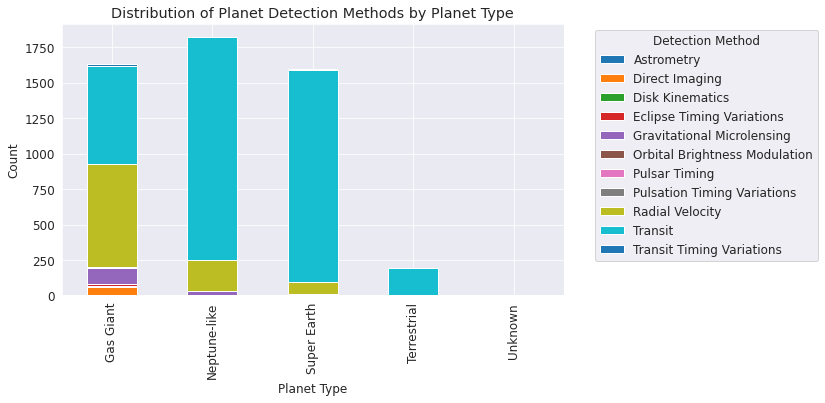

In [105]:
detection_method_counts = planets_df.groupby(['planet_type', 'detection_method']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
detection_method_counts.plot(kind='bar', stacked=True)
plt.xlabel('Planet Type')
plt.ylabel('Count')
plt.title('Distribution of Planet Detection Methods by Planet Type')
plt.legend(title='Detection Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show();

we group the data by both planet type and detection method and calculate the count of each detection method for each planet type. The resulting stacked bar plot compares the distribution of different planet detection methods within each planet type.

Let us save and upload our work to Jovian before continuing.

In [106]:
import jovian

In [107]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rashmin9c/nasa-exoplanets-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rashmin9c/nasa-exoplanets-analysis


'https://jovian.com/rashmin9c/nasa-exoplanets-analysis'

## Inferences and Conclusion

1. **Distribution of Planet Types**: The dataset contains various planet types, with "Gas Giant" being the most common type (approximately 90% of all planets). Other types, such as "Direct Imaging," "Neptune-like," and "Super Earth," are relatively rare.

2. **Trend of Planet Detections over the Years**: The number of planet detections has increased steadily over the years, with a significant rise in discoveries after 2000. This indicates the progress and advancements in exoplanet detection techniques and technology.

3. **Relationship between Stellar Magnitude and Planetary Mass**: The scatter plot shows no clear relationship between the stellar magnitude (brightness) of stars and the mass of their planets. Brighter stars do not necessarily host planets with higher masses, and vice versa.


In conclusion, this data analysis provides valuable insights into the characteristics and distributions of exoplanets based on various attributes. It emphasizes the diversity of exoplanets, showing how they differ in mass, distance from their host stars, and orbital eccentricity. The analysis also highlights the impact of different detection methods on the types and properties of exoplanets discovered. These findings contribute to a better understanding of the exoplanet population and the ongoing efforts to explore and study these distant worlds.

In [108]:
import jovian

In [109]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "rashmin9c/nasa-exoplanets-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/rashmin9c/nasa-exoplanets-analysis


'https://jovian.com/rashmin9c/nasa-exoplanets-analysis'

## References and Future Work

**References:**

https://www.kaggle.com/code/adityamishraml/in-depth-analysis-on-planets-features

https://exoplanets.nasa.gov/

**Future work:**

1. Develop interactive visualizations using libraries like Plotly or Bokeh to create dynamic and user-friendly plots, allowing users to explore the data interactively.

2. Perform time series analysis to explore the trends and patterns in planet discoveries over time. This could involve forecasting future planet detections based on historical data or identifying significant events or changes in the rate of discoveries.

In [112]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>